In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# Import Data

In [2]:
df = pd.read_csv('cleaned_data.csv')
df

,title,text,real_or_fake,title_cleaned,text_cleaned,title_cleaned_filtered,text_cleaned_filtered
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,real,U.S. budget fight loom Republicans flip fiscal...,WASHINGTON Reuters head conservative republica...,U.S. budget fight loom Republicans flip fiscal...,head conservative republican faction U.S. Cong...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,real,U.S. military accept transgender recruit Monda...,WASHINGTON Reuters Transgender people allow ti...,U.S. military accept transgender recruit Monda...,Transgender people allow time enlist U.S. mili...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,real,senior U.S. republican senator let Mr. Mueller...,WASHINGTON Reuters special counsel investigati...,senior U.S. republican senator let Mr. Mueller...,special counsel investigation link Russia Pres...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,real,FBI Russia probe help australian diplomat tip NYT,WASHINGTON Reuters trump campaign adviser Geor...,FBI Russia probe help australian diplomat tip NYT,trump campaign adviser George Papadopoulos tel...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,real,trump want Postal Service charge Amazon shipment,SEATTLE WASHINGTON Reuters President Donald Tr...,trump want Postal Service charge Amazon shipment,President Donald Trump call U.S. Postal Servic...
...,...,...,...,...,...,...,...
41799,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,fake,mcpain John McCain Furious Iran Treated sailor,21st Century Wire say 21wire report early week...,mcpain John McCain Furious Iran Treated sailor,21st Century Wire say 21wire report early week...
41800,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,fake,justice Yahoo Settles e mail Privacy Class act...,21st Century Wire say s familiar theme dispute...,justice Yahoo Settles e mail Privacy Class act...,21st Century Wire say s familiar theme dispute...
41801,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,fake,Sunnistan Allied Safe Zone plan Territorial Bo...,Patrick Henningsen 21st Century WireRemember...,Sunnistan Allied Safe Zone plan Territorial Bo...,Patrick Henningsen 21st Century WireRemember...
41802,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,fake,blow $ 700 million Al Jazeera America finally ...,21st Century Wire say Al Jazeera America histo...,blow $ 700 million Al Jazeera America finally ...,21st Century Wire say Al Jazeera America histo...


# Split data into training and testing

In [3]:
X_title = df['title_cleaned']
X_text = df['text_cleaned']
X_title_text = df['title_cleaned'] + " " + df['text_cleaned']

X_title_filtered = df['title_cleaned_filtered']
X_text_filtered = df['text_cleaned_filtered']
X_title_text_filtered = df['title_cleaned_filtered'] + " " + df['text_cleaned_filtered']

y = np.where(df['real_or_fake'] == 'real', 1, 0)

X_title_train, X_title_test, y_train, y_test = train_test_split(X_title, y, test_size = 0.2, random_state = 42, stratify = y)
X_text_train, X_text_test, y_train, y_test = train_test_split(X_text, y, test_size = 0.2, random_state = 42, stratify = y)
X_title_text_train, X_title_text_test, y_train, y_test = train_test_split(X_title_text, y, test_size = 0.2, random_state = 42, stratify = y)

X_title_filtered_train, X_title_filtered_test, y_train, y_test = train_test_split(X_title_filtered, y, test_size = 0.2, random_state = 42, stratify = y)
X_text_filtered_train, X_text_filtered_test, y_train, y_test = train_test_split(X_text_filtered, y, test_size = 0.2, random_state = 42, stratify = y)
X_title_text_filtered_train, X_title_text_filtered_test, y_train, y_test = train_test_split(X_title_text_filtered, y, test_size = 0.2, random_state = 42, stratify = y)

# Feature Engineering

In [4]:
# create a count vectorizer object
count_vect = CountVectorizer(token_pattern = r'\w{1,}')


In [5]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)

In [6]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 3),
                                   max_features = 5000)

In [7]:
# Modelling helper function
def train_model(classifier, feature_vector_train, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, y_train)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return accuracy_score(predictions, y_test)

In [8]:
# Keep the results in a dataframe
title_results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors'])

text_results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors'])

title_text_results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors'])


title_filtered_results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors'])

text_filtered_results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors'])

title_text_filtered_results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors'])

### Title analysis

#### Modelling using cleaned title

In [9]:
# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(X_title_train)
tfidf_vect.fit(X_title_train)
tfidf_vect_ngram.fit(X_title_train)

# Transform documents to document-term matrix.
X_title_train_count = count_vect.transform(X_title_train)
X_title_test_count = count_vect.transform(X_title_test)

X_title_train_tfidf_word = tfidf_vect.transform(X_title_train)
X_title_test_tfidf_word = tfidf_vect.transform(X_title_test)

X_title_train_tfidf_ngram = tfidf_vect_ngram.transform(X_title_train)
X_title_test_tfidf_ngram = tfidf_vect_ngram.transform(X_title_test)

In [10]:
# count_vect.vocabulary_

# if 'trump' in count_vect.vocabulary_:
#     print('found!')


In [11]:
# Naive Bayes on Count Vectors
accuracy1 = train_model(MultinomialNB(), X_title_train_count, X_title_test_count)
print('NB, Count Vectors    : %.4f\n' % accuracy1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy2 = train_model(MultinomialNB(), X_title_train_tfidf_word, X_title_test_tfidf_word)
print('NB, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy3 = train_model(MultinomialNB(), X_title_train_tfidf_ngram, X_title_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % accuracy3)


title_results.loc['Naïve Bayes'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

NB, Count Vectors    : 0.9516

NB, WordLevel TF-IDF : 0.9452

NB, N-Gram Vectors   : 0.8408



In [12]:
# SVM on Count Vectors
accuracy1 = train_model(LinearSVC(dual="auto"), X_title_train_count, X_title_test_count)
print('SVM, Count Vectors    : %.4f\n' % accuracy1)

# SVM on Word Level TF IDF Vectors
accuracy2 = train_model(LinearSVC(dual="auto"), X_title_train_tfidf_word, X_title_test_tfidf_word)
print('SVM, WordLevel TF-IDF : %.4f\n' % accuracy2)

# SVM on Ngram Level TF IDF Vectors
accuracy3 = train_model(LinearSVC(dual="auto"), X_title_train_tfidf_ngram, X_title_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % accuracy3)


title_results.loc['SVM'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

title_results

SVM, Count Vectors    : 0.9598

SVM, WordLevel TF-IDF : 0.9560

SVM, N-Gram Vectors   : 0.8415



,Count Vectors,WordLevel TF-IDF,N-Gram Vectors
Naïve Bayes,0.951561,0.945222,0.840809
SVM,0.959813,0.955986,0.841526


In [13]:
# Logistic Regression on Count Vectors
accuracy1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), X_title_train_count, X_title_test_count)
print('LR, Count Vectors    : %.4f\n' % accuracy1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy2 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), X_title_train_tfidf_word, X_title_test_tfidf_word)
print('LR, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy3 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), X_title_train_tfidf_ngram, X_title_test_tfidf_ngram)
print('LR, N-Gram Vectors   : %.4f\n' % accuracy3)


title_results.loc['LR'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

title_results

LR, Count Vectors    : 0.9575

LR, WordLevel TF-IDF : 0.9506

LR, N-Gram Vectors   : 0.8402



,Count Vectors,WordLevel TF-IDF,N-Gram Vectors
Naïve Bayes,0.951561,0.945222,0.840809
SVM,0.959813,0.955986,0.841526
LR,0.957541,0.950604,0.840211


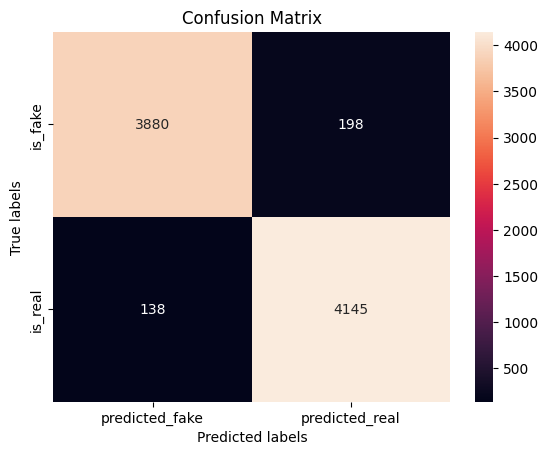

In [14]:
svm = LinearSVC(dual="auto", max_iter=100000)
svm.fit(X_title_train_count, y_train)
y_pred_class = svm.predict(X_title_test_count)
cm = confusion_matrix(y_test, y_pred_class)

columns=['predicted_fake', 'predicted_real']
index=['is_fake', 'is_real']

ax= plt.subplot()
sns.heatmap(cm, fmt='g', ax=ax, annot=True);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(columns); ax.yaxis.set_ticklabels(index);

#### Modelling using cleaned filtered title (without the word 'video')¶

In [15]:
# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(X_title_filtered_train)
tfidf_vect.fit(X_title_filtered_train)
tfidf_vect_ngram.fit(X_title_filtered_train)

# Transform documents to document-term matrix.
X_title_filtered_train_count = count_vect.transform(X_title_filtered_train)
X_title_filtered_test_count = count_vect.transform(X_title_filtered_test)

X_title_filtered_train_tfidf_word = tfidf_vect.transform(X_title_filtered_train)
X_title_filtered_test_tfidf_word = tfidf_vect.transform(X_title_filtered_test)

X_title_filtered_train_tfidf_ngram = tfidf_vect_ngram.transform(X_title_filtered_train)
X_title_filtered_test_tfidf_ngram = tfidf_vect_ngram.transform(X_title_filtered_test)

In [16]:
# Naive Bayes on Count Vectors
accuracy1 = train_model(MultinomialNB(), X_title_filtered_train_count, X_title_filtered_test_count)
print('NB, Count Vectors    : %.4f\n' % accuracy1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy2 = train_model(MultinomialNB(), X_title_filtered_train_tfidf_word, X_title_filtered_test_tfidf_word)
print('NB, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy3 = train_model(MultinomialNB(), X_title_filtered_train_tfidf_ngram, X_title_filtered_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % accuracy3)


title_filtered_results.loc['Naïve Bayes'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}


# SVM on Count Vectors
accuracy1 = train_model(LinearSVC(dual="auto", max_iter=100000), X_title_filtered_train_count, X_title_filtered_test_count)
print('SVM, Count Vectors    : %.4f\n' % accuracy1)

# SVM on Word Level TF IDF Vectors
accuracy2 = train_model(LinearSVC(dual="auto", max_iter=100000), X_title_filtered_train_tfidf_word, X_title_filtered_test_tfidf_word)
print('SVM, WordLevel TF-IDF : %.4f\n' % accuracy2)

# SVM on Ngram Level TF IDF Vectors
accuracy3 = train_model(LinearSVC(dual="auto", max_iter=100000), X_title_filtered_train_tfidf_ngram, X_title_filtered_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % accuracy3)


title_filtered_results.loc['SVM'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

# Logistic Regression on Count Vectors
accuracy1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_title_filtered_train_count, X_title_filtered_test_count)
print('LR, Count Vectors    : %.4f\n' % accuracy1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy2 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_title_filtered_train_tfidf_word, X_title_filtered_test_tfidf_word)
print('LR, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy3 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_title_filtered_train_tfidf_ngram, X_title_filtered_test_tfidf_ngram)
print('LR, N-Gram Vectors   : %.4f\n' % accuracy3)


title_filtered_results.loc['LR'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

title_filtered_results

NB, Count Vectors    : 0.9528

NB, WordLevel TF-IDF : 0.9458

NB, N-Gram Vectors   : 0.8409

SVM, Count Vectors    : 0.9597

SVM, WordLevel TF-IDF : 0.9565

SVM, N-Gram Vectors   : 0.8413

LR, Count Vectors    : 0.9584

LR, WordLevel TF-IDF : 0.9511

LR, N-Gram Vectors   : 0.8397



,Count Vectors,WordLevel TF-IDF,N-Gram Vectors
Naïve Bayes,0.952757,0.945820,0.840928
SVM,0.959694,0.956465,0.841287
LR,0.958378,0.951082,0.839732


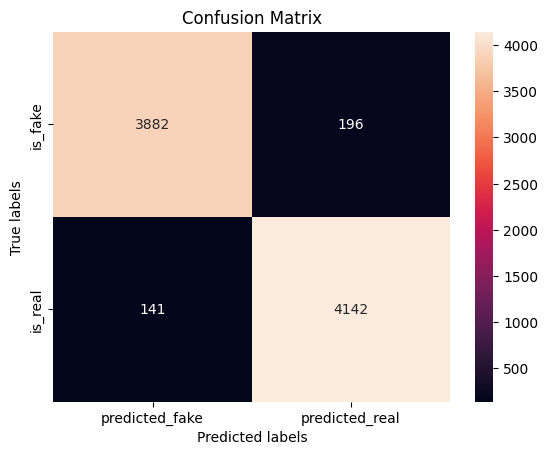

In [17]:
svm = LinearSVC(dual="auto", max_iter=100000)
svm.fit(X_title_filtered_train_count, y_train)
y_pred_class = svm.predict(X_title_filtered_test_count)
cm = confusion_matrix(y_test, y_pred_class)

columns=['predicted_fake', 'predicted_real']
index=['is_fake', 'is_real']

ax= plt.subplot()
sns.heatmap(cm, fmt='g', ax=ax, annot=True);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(columns); ax.yaxis.set_ticklabels(index);

### Text analysis

#### Modelling using cleaned text

In [18]:
# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(X_text_train)
tfidf_vect.fit(X_text_train)
tfidf_vect_ngram.fit(X_text_train)

# Transform documents to document-term matrix.
X_text_train_count = count_vect.transform(X_text_train)
X_text_test_count = count_vect.transform(X_text_test)

X_text_train_tfidf_word = tfidf_vect.transform(X_text_train)
X_text_test_tfidf_word = tfidf_vect.transform(X_text_test)

X_text_train_tfidf_ngram = tfidf_vect_ngram.transform(X_text_train)
X_text_test_tfidf_ngram = tfidf_vect_ngram.transform(X_text_test)

In [19]:
# Naive Bayes on Count Vectors
accuracy1 = train_model(MultinomialNB(), X_text_train_count, X_text_test_count)
print('NB, Count Vectors    : %.4f\n' % accuracy1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy2 = train_model(MultinomialNB(), X_text_train_tfidf_word, X_text_test_tfidf_word)
print('NB, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy3 = train_model(MultinomialNB(), X_text_train_tfidf_ngram, X_text_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % accuracy3)


text_results.loc['Naïve Bayes'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}


# SVM on Count Vectors
accuracy1 = train_model(LinearSVC(dual="auto", max_iter=100000), X_text_train_count, X_text_test_count)
print('SVM, Count Vectors    : %.4f\n' % accuracy1)

# SVM on Word Level TF IDF Vectors
accuracy2 = train_model(LinearSVC(dual="auto", max_iter=100000), X_text_train_tfidf_word, X_text_test_tfidf_word)
print('SVM, WordLevel TF-IDF : %.4f\n' % accuracy2)

# SVM on Ngram Level TF IDF Vectors
accuracy3 = train_model(LinearSVC(dual="auto", max_iter=100000), X_text_train_tfidf_ngram, X_text_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % accuracy3)


text_results.loc['SVM'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

# Logistic Regression on Count Vectors
accuracy1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_text_train_count, X_text_test_count)
print('LR, Count Vectors    : %.4f\n' % accuracy1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy2 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_text_train_tfidf_word, X_text_test_tfidf_word)
print('LR, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy3 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_text_train_tfidf_ngram, X_text_test_tfidf_ngram)
print('LR, N-Gram Vectors   : %.4f\n' % accuracy3)


text_results.loc['LR'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

text_results

NB, Count Vectors    : 0.9612

NB, WordLevel TF-IDF : 0.9376

NB, N-Gram Vectors   : 0.9718

SVM, Count Vectors    : 0.9977

SVM, WordLevel TF-IDF : 0.9968

SVM, N-Gram Vectors   : 0.9913

LR, Count Vectors    : 0.9977

LR, WordLevel TF-IDF : 0.9919

LR, N-Gram Vectors   : 0.9872



,Count Vectors,WordLevel TF-IDF,N-Gram Vectors
Naïve Bayes,0.961249,0.937567,0.971774
SVM,0.997728,0.996771,0.991269
LR,0.997728,0.991867,0.987202


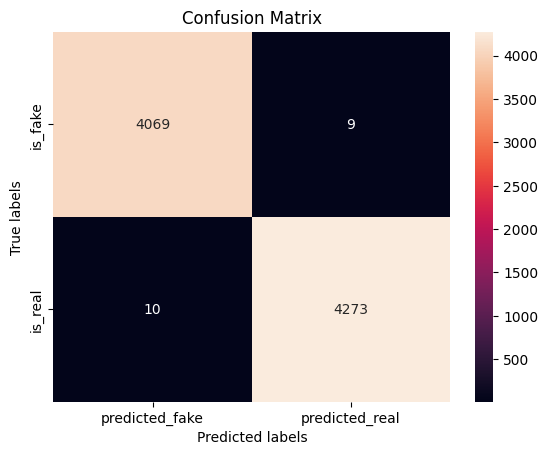

In [20]:
lr = LogisticRegression(solver = 'lbfgs', max_iter = 350)
lr.fit(X_text_train_count, y_train)
y_pred_class = lr.predict(X_text_test_count)
cm = confusion_matrix(y_test, y_pred_class)

columns=['predicted_fake', 'predicted_real']
index=['is_fake', 'is_real']

ax= plt.subplot()
sns.heatmap(cm, fmt='g', ax=ax, annot=True);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(columns); ax.yaxis.set_ticklabels(index);

#### Modelling using cleaned filtered text (without reuters publication at the start of text)

In [21]:
# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(X_text_filtered_train)
tfidf_vect.fit(X_text_filtered_train)
tfidf_vect_ngram.fit(X_text_filtered_train)

# Transform documents to document-term matrix.
X_text_filtered_train_count = count_vect.transform(X_text_filtered_train)
X_text_filtered_test_count = count_vect.transform(X_text_filtered_test)

X_text_filtered_train_tfidf_word = tfidf_vect.transform(X_text_filtered_train)
X_text_filtered_test_tfidf_word = tfidf_vect.transform(X_text_filtered_test)

X_text_filtered_train_tfidf_ngram = tfidf_vect_ngram.transform(X_text_filtered_train)
X_text_filtered_test_tfidf_ngram = tfidf_vect_ngram.transform(X_text_filtered_test)

In [22]:
# Naive Bayes on Count Vectors
accuracy1 = train_model(MultinomialNB(), X_text_filtered_train_count, X_text_filtered_test_count)
print('NB, Count Vectors    : %.4f\n' % accuracy1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy2 = train_model(MultinomialNB(), X_text_filtered_train_tfidf_word, X_text_filtered_test_tfidf_word)
print('NB, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy3 = train_model(MultinomialNB(), X_text_filtered_train_tfidf_ngram, X_text_filtered_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % accuracy3)


text_filtered_results.loc['Naïve Bayes'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}


# SVM on Count Vectors
accuracy1 = train_model(LinearSVC(dual="auto", max_iter=100000), X_text_filtered_train_count, X_text_filtered_test_count)
print('SVM, Count Vectors    : %.4f\n' % accuracy1)

# SVM on Word Level TF IDF Vectors
accuracy2 = train_model(LinearSVC(dual="auto", max_iter=100000), X_text_filtered_train_tfidf_word, X_text_filtered_test_tfidf_word)
print('SVM, WordLevel TF-IDF : %.4f\n' % accuracy2)

# SVM on Ngram Level TF IDF Vectors
accuracy3 = train_model(LinearSVC(dual="auto", max_iter=100000), X_text_filtered_train_tfidf_ngram, X_text_filtered_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % accuracy3)


text_filtered_results.loc['SVM'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

# Logistic Regression on Count Vectors
accuracy1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_text_filtered_train_count, X_text_filtered_test_count)
print('LR, Count Vectors    : %.4f\n' % accuracy1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy2 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_text_filtered_train_tfidf_word, X_text_filtered_test_tfidf_word)
print('LR, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy3 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_text_filtered_train_tfidf_ngram, X_text_filtered_test_tfidf_ngram)
print('LR, N-Gram Vectors   : %.4f\n' % accuracy3)


text_filtered_results.loc['LR'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

text_filtered_results

NB, Count Vectors    : 0.9551

NB, WordLevel TF-IDF : 0.9342

NB, N-Gram Vectors   : 0.9681

SVM, Count Vectors    : 0.9891

SVM, WordLevel TF-IDF : 0.9925

SVM, N-Gram Vectors   : 0.9873

LR, Count Vectors    : 0.9909

LR, WordLevel TF-IDF : 0.9867

LR, N-Gram Vectors   : 0.9845



,Count Vectors,WordLevel TF-IDF,N-Gram Vectors
Naïve Bayes,0.955149,0.934218,0.968066
SVM,0.989116,0.992465,0.987322
LR,0.990910,0.986724,0.984452


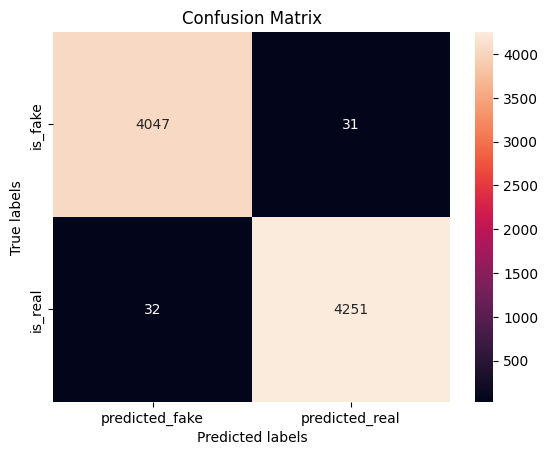

In [23]:
svm = LinearSVC(dual="auto", max_iter=100000)
svm.fit(X_text_filtered_train_tfidf_word, y_train)
y_pred_class = svm.predict(X_text_filtered_test_tfidf_word)
cm = confusion_matrix(y_test, y_pred_class)

columns=['predicted_fake', 'predicted_real']
index=['is_fake', 'is_real']

ax= plt.subplot()
sns.heatmap(cm, fmt='g', ax=ax, annot=True);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(columns); ax.yaxis.set_ticklabels(index);

### Title and text analysis

#### Modelling using cleaned title and text

In [24]:
# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(X_title_text_train)
tfidf_vect.fit(X_title_text_train)
tfidf_vect_ngram.fit(X_title_text_train)

# Transform documents to document-term matrix.
X_title_text_train_count = count_vect.transform(X_title_text_train)
X_title_text_test_count = count_vect.transform(X_title_text_test)

X_title_text_train_tfidf_word = tfidf_vect.transform(X_title_text_train)
X_title_text_test_tfidf_word = tfidf_vect.transform(X_title_text_test)

X_title_text_train_tfidf_ngram = tfidf_vect_ngram.transform(X_title_text_train)
X_title_text_test_tfidf_ngram = tfidf_vect_ngram.transform(X_title_text_test)

In [25]:
# Naive Bayes on Count Vectors
accuracy1 = train_model(MultinomialNB(), X_title_text_train_count, X_title_text_test_count)
print('NB, Count Vectors    : %.4f\n' % accuracy1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy2 = train_model(MultinomialNB(), X_title_text_train_tfidf_word, X_title_text_test_tfidf_word)
print('NB, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy3 = train_model(MultinomialNB(), X_title_text_train_tfidf_ngram, X_title_text_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % accuracy3)


title_text_results.loc['Naïve Bayes'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}


# SVM on Count Vectors
accuracy1 = train_model(LinearSVC(dual="auto", max_iter=100000),  X_title_text_train_count, X_title_text_test_count)
print('SVM, Count Vectors    : %.4f\n' % accuracy1)

# SVM on Word Level TF IDF Vectors
accuracy2 = train_model(LinearSVC(dual="auto", max_iter=100000), X_title_text_train_tfidf_word, X_title_text_test_tfidf_word)
print('SVM, WordLevel TF-IDF : %.4f\n' % accuracy2)

# SVM on Ngram Level TF IDF Vectors
accuracy3 = train_model(LinearSVC(dual="auto", max_iter=100000),  X_title_text_train_tfidf_ngram, X_title_text_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % accuracy3)


title_text_results.loc['SVM'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

# Logistic Regression on Count Vectors
accuracy1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_title_text_train_count, X_title_text_test_count)
print('LR, Count Vectors    : %.4f\n' % accuracy1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy2 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_title_text_train_tfidf_word, X_title_text_test_tfidf_word)
print('LR, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy3 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_title_text_train_tfidf_ngram, X_title_text_test_tfidf_ngram)
print('LR, N-Gram Vectors   : %.4f\n' % accuracy3)


title_text_results.loc['LR'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

title_text_results

NB, Count Vectors    : 0.9621

NB, WordLevel TF-IDF : 0.9415

NB, N-Gram Vectors   : 0.9745

SVM, Count Vectors    : 0.9978

SVM, WordLevel TF-IDF : 0.9970

SVM, N-Gram Vectors   : 0.9921

LR, Count Vectors    : 0.9980

LR, WordLevel TF-IDF : 0.9917

LR, N-Gram Vectors   : 0.9870



,Count Vectors,WordLevel TF-IDF,N-Gram Vectors
Naïve Bayes,0.962086,0.941514,0.974525
SVM,0.997847,0.997010,0.992106
LR,0.997967,0.991747,0.986963


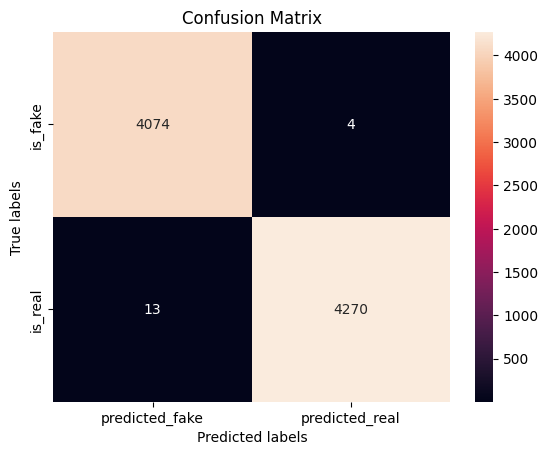

In [26]:
lr = LogisticRegression(solver = 'lbfgs', max_iter = 350)
lr.fit(X_title_text_train_count, y_train)
y_pred_class = lr.predict(X_title_text_test_count)
cm = confusion_matrix(y_test, y_pred_class)

columns=['predicted_fake', 'predicted_real']
index=['is_fake', 'is_real']

ax= plt.subplot()
sns.heatmap(cm, fmt='g', ax=ax, annot=True);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(columns); ax.yaxis.set_ticklabels(index);

#### Modelling using cleaned filtered title and text

In [27]:
# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(X_title_text_filtered_train)
tfidf_vect.fit(X_title_text_filtered_train)
tfidf_vect_ngram.fit(X_title_text_filtered_train)

# Transform documents to document-term matrix.
X_title_text_filtered_train_count = count_vect.transform(X_title_text_filtered_train)
X_title_text_filtered_test_count = count_vect.transform(X_title_text_filtered_test)

X_title_text_filtered_train_tfidf_word = tfidf_vect.transform(X_title_text_filtered_train)
X_title_text_filtered_test_tfidf_word = tfidf_vect.transform(X_title_text_filtered_test)

X_title_text_filtered_train_tfidf_ngram = tfidf_vect_ngram.transform(X_title_text_filtered_train)
X_title_text_filtered_test_tfidf_ngram = tfidf_vect_ngram.transform(X_title_text_filtered_test)

In [28]:
# Naive Bayes on Count Vectors
accuracy1 = train_model(MultinomialNB(), X_title_text_filtered_train_count, X_title_text_filtered_test_count)
print('NB, Count Vectors    : %.4f\n' % accuracy1)

# Naive Bayes on Word Level TF IDF Vectors
accuracy2 = train_model(MultinomialNB(), X_title_text_filtered_train_tfidf_word, X_title_text_filtered_test_tfidf_word)
print('NB, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy3 = train_model(MultinomialNB(), X_title_text_filtered_train_tfidf_ngram, X_title_text_filtered_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % accuracy3)


title_text_filtered_results.loc['Naïve Bayes'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}


# SVM on Count Vectors
accuracy1 = train_model(LinearSVC(dual="auto", max_iter=100000),  X_title_text_filtered_train_count, X_title_text_filtered_test_count)
print('SVM, Count Vectors    : %.4f\n' % accuracy1)

# SVM on Word Level TF IDF Vectors
accuracy2 = train_model(LinearSVC(dual="auto", max_iter=100000), X_title_text_filtered_train_tfidf_word, X_title_text_filtered_test_tfidf_word)
print('SVM, WordLevel TF-IDF : %.4f\n' % accuracy2)

# SVM on Ngram Level TF IDF Vectors
accuracy3 = train_model(LinearSVC(dual="auto", max_iter=100000),  X_title_text_filtered_train_tfidf_ngram, X_title_text_filtered_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % accuracy3)


title_text_filtered_results.loc['SVM'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

# Logistic Regression on Count Vectors
accuracy1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_title_text_filtered_train_count, X_title_text_filtered_test_count)
print('LR, Count Vectors    : %.4f\n' % accuracy1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy2 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_title_text_filtered_train_tfidf_word, X_title_text_filtered_test_tfidf_word)
print('LR, WordLevel TF-IDF : %.4f\n' % accuracy2)

# Logistic Regression on Ngram Level TF IDF Vectors
accuracy3 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 1000), X_title_text_filtered_train_tfidf_ngram, X_title_text_filtered_test_tfidf_ngram)
print('LR, N-Gram Vectors   : %.4f\n' % accuracy3)


title_text_filtered_results.loc['LR'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3}

title_text_filtered_results

NB, Count Vectors    : 0.9573

NB, WordLevel TF-IDF : 0.9376

NB, N-Gram Vectors   : 0.9717

SVM, Count Vectors    : 0.9900

SVM, WordLevel TF-IDF : 0.9938

SVM, N-Gram Vectors   : 0.9883

LR, Count Vectors    : 0.9919

LR, WordLevel TF-IDF : 0.9888

LR, N-Gram Vectors   : 0.9842



,Count Vectors,WordLevel TF-IDF,N-Gram Vectors
Naïve Bayes,0.957302,0.937567,0.971654
SVM,0.989953,0.993781,0.988279
LR,0.991867,0.988757,0.984212


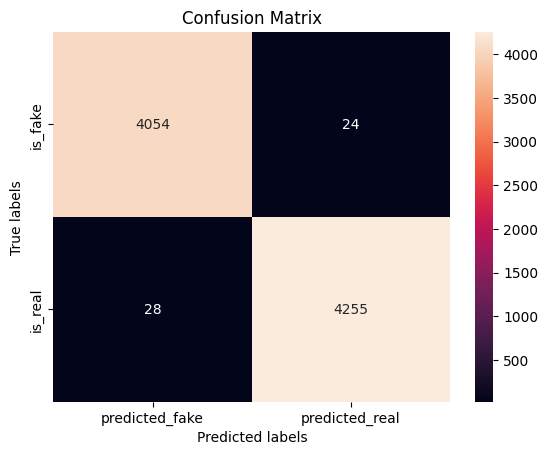

In [29]:
svm = LinearSVC(dual="auto", max_iter=100000)
svm.fit(X_title_text_filtered_train_tfidf_word, y_train)
y_pred_class = svm.predict(X_title_text_filtered_test_tfidf_word)
cm = confusion_matrix(y_test, y_pred_class)

columns=['predicted_fake', 'predicted_real']
index=['is_fake', 'is_real']

ax= plt.subplot()
sns.heatmap(cm, fmt='g', ax=ax, annot=True);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(columns); ax.yaxis.set_ticklabels(index);